### Import all dependencies

In [74]:
from builtins import range, input

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, AveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


import cv2
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

### Define Few Parameters

In [75]:
#define size to which images are to be resized
IMAGE_SIZE = [224, 224] # feel free to change depending on dataset

# training config:
epochs = 5
batch_size = 3

#define paths
covid_path = 'Ct_Scan_Dataset/covidct'
noncovid_path = 'Ct_Scan_Dataset/normalct'

Penomoni = 'Ct_Scan_Dataset/Penomoni'
Boronsit = 'Ct_Scan_Dataset/Boronsit'
Possible_Covid = 'Ct_Scan_Dataset/Possible Covid'
possible_Penomoni = 'Ct_Scan_Dataset/possible Penomoni'



# Use glob to grab images from path .jpg or jpeg
covid_files = glob(covid_path + '/*')
noncovid_files = glob(noncovid_path + '/*')

Possible_Covid_files = glob(Possible_Covid + '/*')
Penomoni_files = glob(Penomoni + '/*')
Boronsit_files = glob(Boronsit + '/*')
possible_Penomoni_files = glob(possible_Penomoni + '/*')

In [76]:
# Visualize file variable contents
print("First 5 Covid Files: ",covid_files[0:5])
print("Total Count: ",len(covid_files))

print("First 5 NonCovid Files: ",noncovid_files[0:5])
print("Total Count: ",len(noncovid_files))

print("First 5 Possible_Covid Files: ",Possible_Covid_files[0:5])
print("Total Count: ",len(Possible_Covid_files))


print("First 5 Penomoni Files: ",Penomoni_files[0:5])
print("Total Count: ",len(Penomoni_files))

print("First 5 Boronsit Files: ",Boronsit_files[0:5])
print("Total Count: ",len(Boronsit_files))

print("First 5 possible_Penomoni Files: ",possible_Penomoni_files[0:5])
print("Total Count: ",len(possible_Penomoni_files))

First 5 Covid Files:  ['Ct_Scan_Dataset/covidct\\2020.02.10.20021584-p6-52%10.png', 'Ct_Scan_Dataset/covidct\\2020.02.10.20021584-p6-52%11.png', 'Ct_Scan_Dataset/covidct\\2020.02.10.20021584-p6-52%12.png', 'Ct_Scan_Dataset/covidct\\2020.02.10.20021584-p6-52%13.png', 'Ct_Scan_Dataset/covidct\\2020.02.10.20021584-p6-52%14.png']
Total Count:  24
First 5 NonCovid Files:  ['Ct_Scan_Dataset/normalct\\0.jpg', 'Ct_Scan_Dataset/normalct\\1%0.jpg', 'Ct_Scan_Dataset/normalct\\1%1.jpg', 'Ct_Scan_Dataset/normalct\\1%2.jpg', 'Ct_Scan_Dataset/normalct\\2%0.jpg']
Total Count:  19
First 5 Possible_Covid Files:  ['Ct_Scan_Dataset/Possible Covid\\2020.02.10.20021584-p6-52%10.png', 'Ct_Scan_Dataset/Possible Covid\\2020.02.10.20021584-p6-52%11.png', 'Ct_Scan_Dataset/Possible Covid\\2020.02.10.20021584-p6-52%12.png', 'Ct_Scan_Dataset/Possible Covid\\2020.02.10.20021584-p6-52%13.png', 'Ct_Scan_Dataset/Possible Covid\\2020.02.10.20021584-p6-52%14.png']
Total Count:  12
First 5 Penomoni Files:  ['Ct_Scan_Datas

### Fetch Images and Class Labels from Files (This might take a while)

In [77]:
# Fetch Images and Class Labels from Files
covid_labels = []
noncovid_labels = []
Possible_Covid_labels=[]
Penomoni_labels=[]
Boronsit_labels=[]
possible_Penomoni_labels=[]


covid_images=[]
noncovid_images=[]
Possible_Covid=[]
Penomoni=[]
Boronsit=[]
possible_Penomoni=[]


for i in range(len(covid_files)):
  image = cv2.imread(covid_files[i]) # read file 
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # arrange format as per kera
  image = cv2.resize(image,(224,224)) # resize as per model
  covid_images.append(image) # append image
  covid_labels.append('CT_COVID') # append class label

for i in range(len(noncovid_files)):
  image = cv2.imread(noncovid_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  noncovid_images.append(image)
  noncovid_labels.append('CT_NonCOVID')

for i in range(len(Possible_Covid_files)):
  image = cv2.imread(Possible_Covid_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  Possible_Covid.append(image)
  Possible_Covid_labels.append('Possible_Covid_files')

for i in range(len(Penomoni_files)):
  image = cv2.imread(Penomoni_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  Penomoni.append(image)
  Penomoni_labels.append('Penomoni_files')



for i in range(len(Boronsit_files)):
  image = cv2.imread(Boronsit_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  Boronsit.append(image)
  Boronsit_labels.append('Boronsit_files')



for i in range(len(possible_Penomoni_files)):
  image = cv2.imread(possible_Penomoni_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  possible_Penomoni.append(image)
  possible_Penomoni_labels.append('possible_Penomoni_files')


### Visualize First 40 Images from Data set

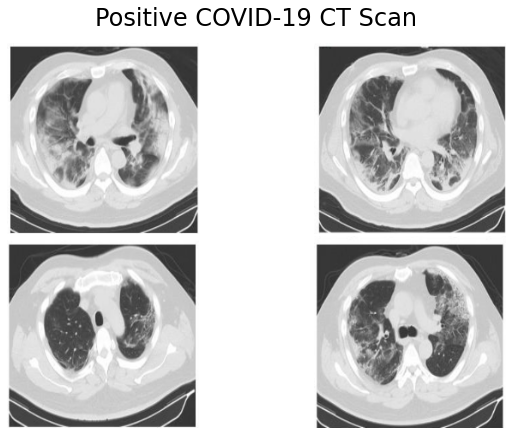

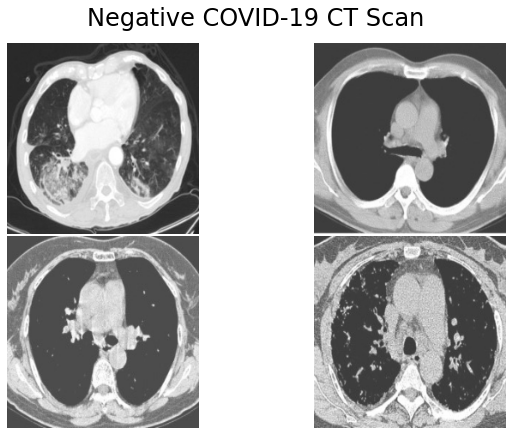

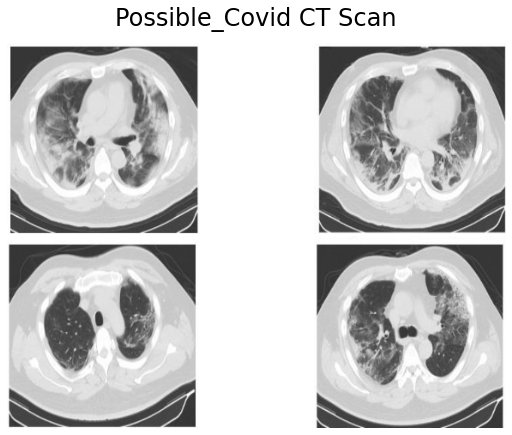

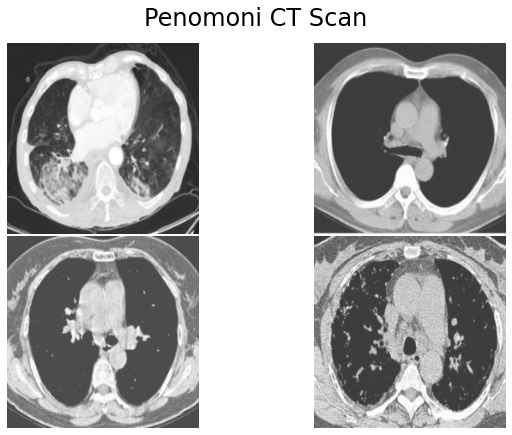

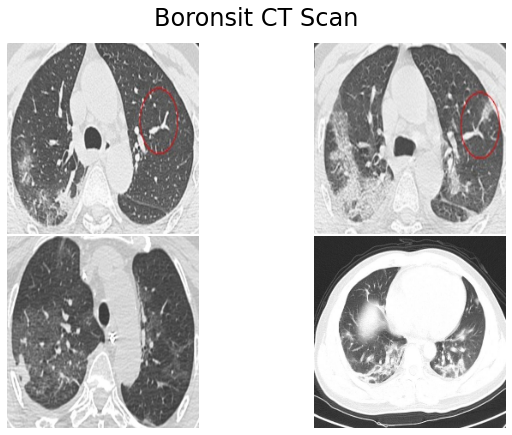

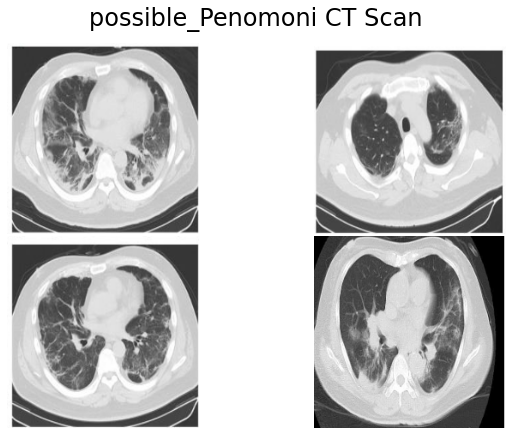

In [78]:
# look at a random image for fun
def plot_images(images, title):
    nrows, ncols = 2,2
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()
    
    
plot_images(covid_images, 'Positive COVID-19 CT Scan')
plot_images(noncovid_images, 'Negative COVID-19 CT Scan')
plot_images(Possible_Covid, 'Possible_Covid CT Scan')
plot_images(Penomoni, 'Penomoni CT Scan')
plot_images(Boronsit, 'Boronsit CT Scan')
plot_images(possible_Penomoni, 'possible_Penomoni CT Scan')

### **Normalization**
#### Model takes images in the form of array of pixels. Hence convert into array and *normalize*

In [79]:
# Convert to array and Normalize to interval of [0,1]
covid_images = np.array(covid_images) / 255
noncovid_images = np.array(noncovid_images) / 255

Possible_Covid= np.array(Possible_Covid) / 255
Penomoni= np.array(Penomoni) / 255
Boronsit= np.array(Boronsit) / 255
possible_Penomoni= np.array(possible_Penomoni) / 255

In [80]:
print('shape of all images:')
print(covid_images.shape)
print(noncovid_images.shape)
print(Possible_Covid.shape)
print(Penomoni.shape)
print(Boronsit.shape)
print(possible_Penomoni.shape)
all_images=np.concatenate((covid_images,noncovid_images,Possible_Covid,
                           Penomoni,Boronsit,possible_Penomoni),axis=0)
print('total images:%s'%(str(all_images.shape)))

shape of all images:
(24, 224, 224, 3)
(19, 224, 224, 3)
(12, 224, 224, 3)
(16, 224, 224, 3)
(12, 224, 224, 3)
(12, 224, 224, 3)
total images:(95, 224, 224, 3)


In [81]:
print('length of the labels:')
print(len(covid_labels))
print(len(noncovid_labels))
print(len(Possible_Covid_labels))
print(len(Penomoni_labels))
print(len(Boronsit_labels))
print(len(possible_Penomoni_labels))
all_labels=np.array(covid_labels+noncovid_labels+Possible_Covid_labels+\
            Penomoni_labels+Boronsit_labels+possible_Penomoni_labels)      

all_labels=all_labels.reshape(-1,1)  
print("labels shape: %s"%(str(all_labels.shape)))

length of the labels:
24
19
12
16
12
12
labels shape: (95, 1)


###  Convert Categorical label to one-hot

In [82]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
onehot_labels = encoder.fit_transform(all_labels)
print(onehot_labels.shape)

(95, 6)


### **Train Test Split**

In [83]:
X_train,X_test,y_train,y_test=train_test_split(all_images,onehot_labels,test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(76, 224, 224, 3)
(76, 6)
(19, 224, 224, 3)
(19, 6)


In [84]:
# # split into training and testing
# covid_x_train, covid_x_test, covid_y_train, covid_y_test = train_test_split(
#     covid_images, covid_labels, test_size=0.2)
# noncovid_x_train, noncovid_x_test, noncovid_y_train, noncovid_y_test = train_test_split(
#     noncovid_images, noncovid_labels, test_size=0.2)

# #-------------------------------------------------------------------------------------------
# Possible_Covid_x_train, Possible_Covid_x_test, Possible_Covid_y_train, Possible_Covid_y_test = train_test_split(
#     Possible_Covid, Possible_Covid_labels, test_size=0.2)

# Penomoni_x_train, Penomoni_x_test, Penomoni_y_train, Penomoni_y_test = train_test_split(
#     Penomoni, Penomoni_labels, test_size=0.2)

# Boronsit_x_train, Boronsit_x_test, Boronsit_y_train, Boronsit_y_test = train_test_split(
#     Boronsit, Boronsit_labels, test_size=0.2)


# possible_Penomoni_x_train, possible_Penomoni_x_test, possible_Penomoni_y_train, possible_Penomoni_y_test = train_test_split(
#     possible_Penomoni, possible_Penomoni_labels, test_size=0.2)
# #-----------------------------------------------------------------------------------------


# X_train = np.concatenate((noncovid_x_train, covid_x_train,Possible_Covid_x_train,Penomoni_x_train,Boronsit_x_train,possible_Penomoni_x_train), axis=0)
# X_test = np.concatenate((noncovid_x_test, covid_x_test,Possible_Covid_x_test,Penomoni_x_test,Boronsit_x_test,possible_Penomoni_x_test), axis=0)

# y_train = np.concatenate((noncovid_y_train, covid_y_train,Possible_Covid_y_train,Penomoni_y_train,Boronsit_y_train,possible_Penomoni_y_train), axis=0)
# y_test = np.concatenate((noncovid_y_test, covid_y_test,Possible_Covid_y_test,Penomoni_y_test,Boronsit_y_test,possible_Penomoni_y_test), axis=0)

# # make labels into categories - either 0 or 1
# y_train = LabelBinarizer().fit_transform(y_train)
# y_train = to_categorical(y_train)

# y_test = LabelBinarizer().fit_transform(y_test)
# y_test = to_categorical(y_test)

### Visualize a few images from Training and Test sets

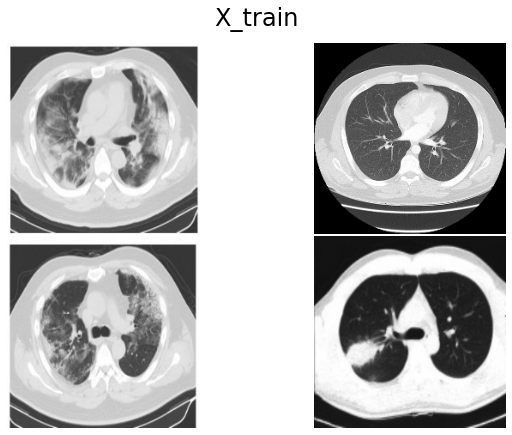

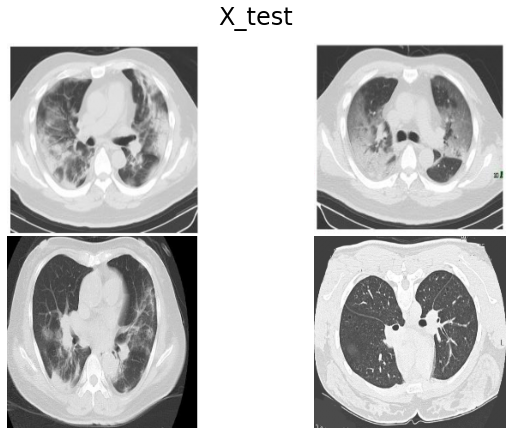

In [85]:
plot_images(X_train, 'X_train')
plot_images(X_test, 'X_test')
# y_train and y_test contain class lables 0 and 1 representing COVID and NonCOVID for X_train and X_test

### **Building and Visualizing model**

In [102]:
inception = InceptionV3(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

outputs = inception.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(6, activation="softmax")(outputs)

model = Model(inputs=inception.input, outputs=outputs)

for layer in inception.layers:
    layer.trainable = False

model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
)


NameError: name 'metrics' is not defined

In [87]:
# Visualize Model
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 111, 111, 32) 96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 111, 111, 32) 0           batch_normalization_188[0][0]    
____________________________________________________________________________________________

Total params: 22,109,990
Trainable params: 307,206
Non-trainable params: 21,802,784
__________________________________________________________________________________________________


### **Image Augmentation**
#### To train on images at different positions, angles, flips, etc

In [88]:
train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

### **Training the model**

In [89]:
print(X_train.shape)
print(y_train.shape)

(76, 224, 224, 3)
(76, 6)


In [90]:

history = model.fit(train_aug.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / batch_size,
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=epochs)

Epoch 1/5
26/25 [==============================] - 49s 2s/step - loss: 10.5739 - acc: 0.1711 - val_loss: 5.1870 - val_acc: 0.4211
Epoch 2/5
26/25 [==============================] - 37s 1s/step - loss: 4.4287 - acc: 0.2895 - val_loss: 4.0760 - val_acc: 0.2632
Epoch 3/5
26/25 [==============================] - 39s 1s/step - loss: 5.1939 - acc: 0.2763 - val_loss: 10.1775 - val_acc: 0.2105
Epoch 4/5
26/25 [==============================] - 37s 1s/step - loss: 5.5256 - acc: 0.3684 - val_loss: 6.5639 - val_acc: 0.2105
Epoch 5/5
26/25 [==============================] - 37s 1s/step - loss: 6.5862 - acc: 0.2500 - val_loss: 7.3277 - val_acc: 0.3684


In [91]:
# Save Model and Weights
model.save('inception_ct.h5')
model.save_weights('inception_weights_ct.hdf5')

In [92]:
# Load saved model
model = load_model('inception_ct.h5')

### **Making Predicions**

In [93]:
y_pred = model.predict(X_test, batch_size=batch_size)

### Visulaizing First 10 predictions

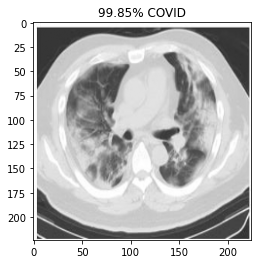

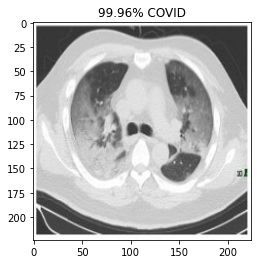

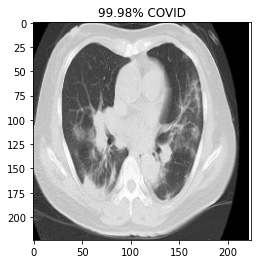

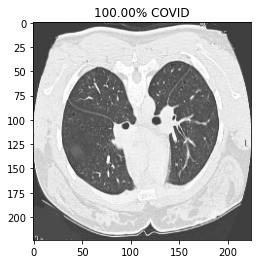

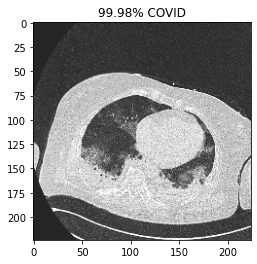

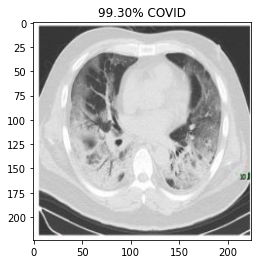

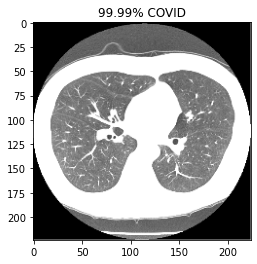

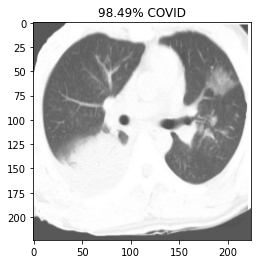

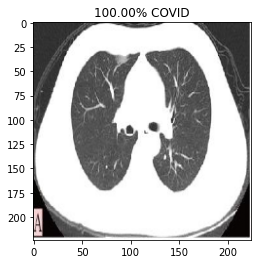

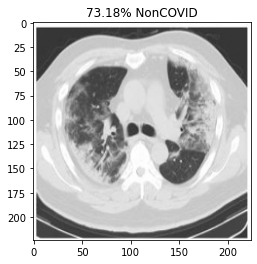

In [94]:
prediction=y_pred[0:10]
for index, probability in enumerate(prediction):
  if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% COVID')
  else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% NonCOVID')
  plt.style.reload_library
  plt.imshow(X_test[index])
  plt.show()

In [95]:
# Convert to Binary classes
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test, axis=1)

### Plot ROC Curve

In [96]:
#fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
#plt.plot(fpr, tpr)
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.0])
#plt.rcParams['font.size'] = 12
#plt.title('ROC curve for our model')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.grid(True)

In [97]:
covid_images=[]
noncovid_images=[]
Possible_Covid=[]
Penomoni=[]
Boronsit=[]
possible_Penomoni=[]

### Plot Confusion Matrix

Confusion Matrix without Normalization


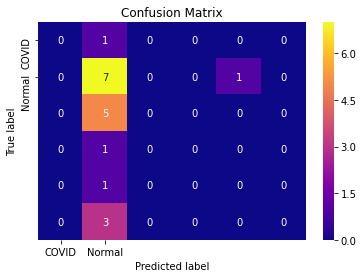

Confusion Matrix with Normalized Values


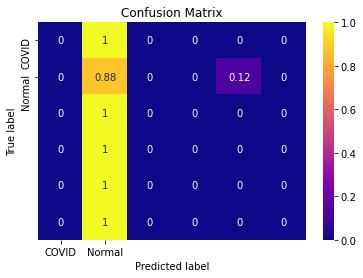

In [98]:
def plot_confusion_matrix(normalize):
  classes = ['COVID','Normal','Possible_Covid','Penomoni','Boronsit','possible_Penomoni']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_bin, y_pred_bin,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

### **Classification Report**

In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test_bin, y_pred_bin))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.39      0.88      0.54         8
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3

    accuracy                           0.37        19
   macro avg       0.06      0.15      0.09        19
weighted avg       0.16      0.37      0.23        19



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Accuracy and Loss Plots**

In [105]:
plt.figure(figsize=(5,5))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('inception_ct_accuracy.png')
plt.show()


KeyError: 'accuracy'

<Figure size 360x360 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('inception_ct_loss.png')
plt.show()

In [106]:
cm  = confusion_matrix(y_test_bin, y_pred_bin)
cm

array([[0, 1, 0, 0, 0, 0],
       [0, 7, 0, 0, 1, 0],
       [0, 5, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0]], dtype=int64)

In [118]:
# Get the confusion matrix
cm  = confusion_matrix(y_test_bin, y_pred_bin)
plt.figure()
plot_confusion_matrix(cm,figsize=(20,21), hide_ticks=True, alpha=0.7,cmap=plt.cm.Blues)
plt.xticks(range(3), ['Normal', 'Bacteria', 'Virus'], fontsize=16)
plt.yticks(range(3), ['Normal', 'Bacteria', 'Virus'], fontsize=16)
plt.show()


TypeError: plot_confusion_matrix() got an unexpected keyword argument 'figsize'

<Figure size 432x288 with 0 Axes>

In [108]:
cm[0][0]

0

In [109]:
tn = cm[0][0]
fn = cm[0][1]+cm[0][2]
tb = cm[1][1]
fb = cm[1][0]+cm[1][2]
tv = cm[2][2]
fv = cm[2][0]+cm[2][1]

In [110]:
# Calculate Precision and Recall
# tn, fb, fn, tb = cm.ravel()

recall = (tb+tv)/(tb+fb+tv+fv)
precision = (tb+tv)/(tb+tv+fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))

Recall of the model is 0.58
Precision of the model is 0.88


In [111]:
def plot_learning_curve(history):
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    #plt.clf()
    # summarize history for loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.savefig('./loss_curve.png')

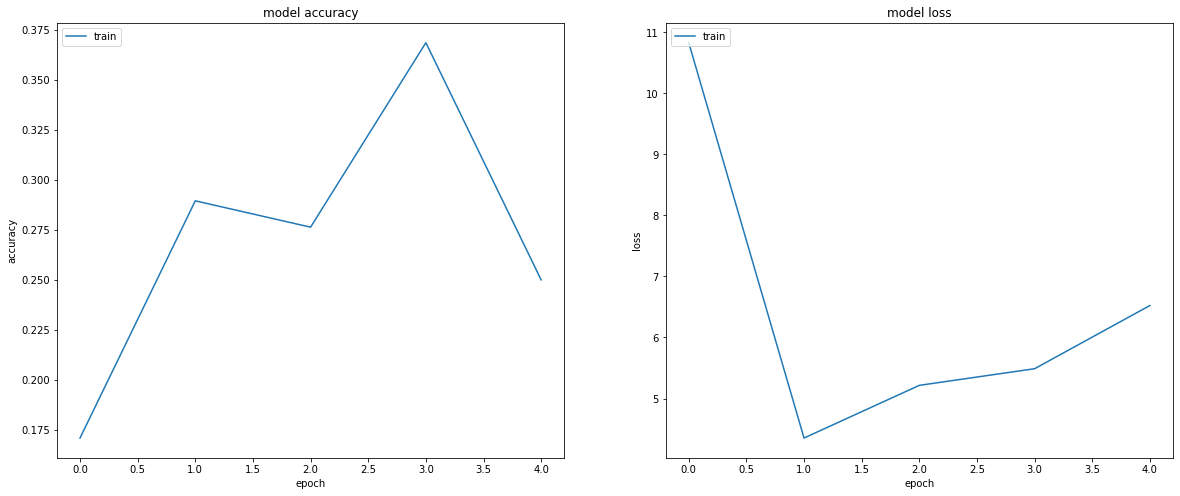

In [112]:
plot_learning_curve(history)
plt.show()

In [129]:
#y_pred = model.predict(y_test_bin)
# y_val_int = np.argmax(y_val, axis=1)
cn = confusion_matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_bin, y_pred_bin)
np.set_printoptions(precision=2)

In [130]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[0 1 0 0 0 0]
 [0 7 0 0 1 0]
 [0 5 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 3 0 0 0 0]]
Normalized confusion matrix
[[0.   1.   0.   0.   0.   0.  ]
 [0.   0.88 0.   0.   0.12 0.  ]
 [0.   1.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.  ]]


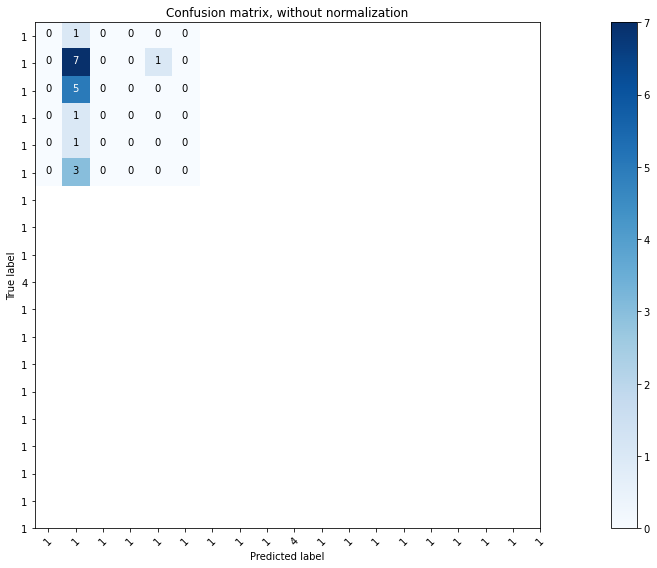

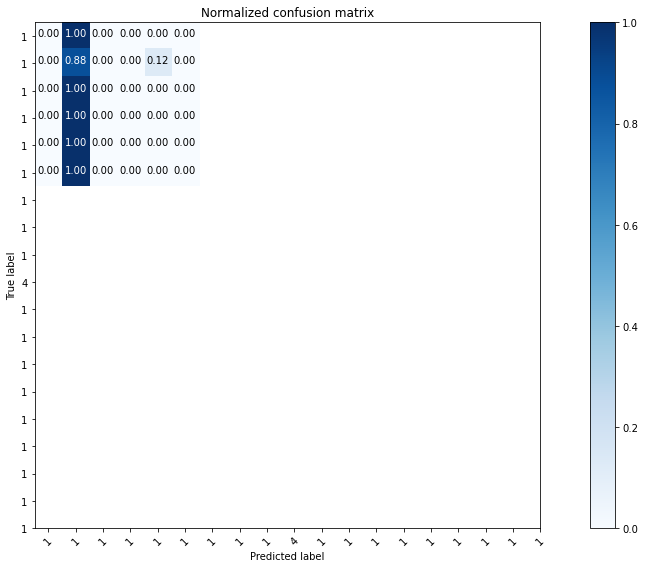

In [137]:
# Plot non-normalized confusion matrix
import itertools  
plt.figure(figsize=(20, 8))
plot_confusion_matrix(cnf_matrix, classes=y_pred_bin,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(14, 8))
plot_confusion_matrix(cnf_matrix, classes=y_pred_bin, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [189]:
inv_hot = {0: 'Boronshit-Nodel-Artifact', 1: 'Covid-19', 2: 'Pneumonia', 3: 'Point-Of-Covid-19', 4: 'Point-Of-Pneumonia'}


In [193]:
from keras.models import Sequential,Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras.backend as K
#from NNfucnctions import precision, recall

NUM_CLASSES = 15
BATCH_SIZE = 32

def precision(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1))) 
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1))) 
    precision = true_positives / (predicted_positives + K.epsilon()) 
    return precision

def recall(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1))) 
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1))) 
    recall = true_positives / (possible_positives + K.epsilon()) 
    return recall 

Using TensorFlow backend.


In [196]:
#box_model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
box_model = Sequential()
#box_model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation = 'relu'))
#box_model.add(MaxPooling2D(pool_size=(4, 4)))
box_model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation = 'relu'))
box_model.add(MaxPooling2D(pool_size=(4, 4)))
box_model.add(Conv2D(64, (3, 3), input_shape=(224, 224, 3), activation = 'relu'))
box_model.add(MaxPooling2D(pool_size=(4, 4)))
box_model.add(Flatten())
box_model.add(Dropout(0.5))

box_model.add(Dense(64, activation='relu'))
box_model.add(Dropout(0.5))

box_model.add(Dense(32, activation='relu'))
box_model.add(Dropout(0.5))

box_model.add(Dense(6, activation='relu'))

box_model.summary()

box_model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

box_model.fit(X_train, y_train,
          batch_size = BATCH_SIZE,
          epochs = 10,
          validation_split = 0.3)
box_model.save('box_model.h')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 53, 53, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 10816)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                692288    
__________

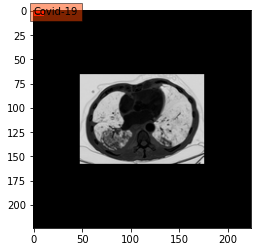

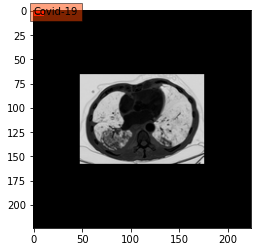

In [244]:
from PIL import Image, ImageDraw
import os
import matplotlib.pyplot as plt
%matplotlib inline

#root_dir = ''
#img_dir = os.path.join()


def draw_bnd_box(img_arr, p,obj_class) :
    tmp_img_arr = 255 * img_arr
    tmp_img_arr = np.int_(tmp_img_arr)
    tmp_img_arr = np.asarray(tmp_img_arr, dtype = 'uint8')
    im = Image.fromarray(tmp_img_arr, 'RGB')
    
    xmin = p[0]
    ymin = p[1]
    xmax = p[2]
    ymax = p[3]
    
    colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()

    plt.imshow(im)
    currentAxis = plt.gca()
    
    coords = (xmin, ymin), xmax-xmin+1, ymax-ymin+1
    color = colors[0]
    
    currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
    currentAxis.text(xmin, ymin, obj_class, bbox={'facecolor':colors[1], 'alpha':0.5})
    
    
    
    #draw = ImageDraw.Draw(im)
    #draw.rectangle([(p[0], p[1]), (p[2], p[3])], outline = 'green')
    #im.show()
    plt.show()
    
def predict_bnd_box(img_filename,obj_class) :
    img_arr, dummy = load_img(img_filename)
    ans = box_model.predict(np.array([img_arr]))
    ans[0] = list(map(int, ans[0]))
    draw_bnd_box(img_arr, ans[0],obj_class)
    
def scale_bnd_box_cord(p, dim) :
    scale_fac = 224 / max(dim[0], dim[1])
    rv = [int(x * scale_fac) for x in p]
    return np.array(rv)

def load_img(img_filename, bnd_box = (0, 0, 0, 0)):
    MAX_X = MAX_Y = 224
    
    tmp_img = Image.open(os.path.join(img_dir, img_filename))
    bnd_box = scale_bnd_box_cord(bnd_box, tmp_img.size)
    tmp_img.thumbnail((128, 128), Image.ANTIALIAS)
    
    img_arr = np.array(tmp_img)
    
    img_x, img_y = img_arr.shape[0], img_arr.shape[1]
    pad_x = (MAX_X - img_x)
    pad_y = (MAX_Y - img_y)
    odd_x = pad_x & 1
    odd_y = pad_y & 1
    pad_x //= 2
    pad_y //= 2
    
    bnd_box[1] += pad_x + odd_x
    bnd_box[3] += pad_x + odd_x
    bnd_box[0] += pad_y + odd_y
    bnd_box[2] += pad_y + odd_y
    
    img_arr = np.pad(img_arr, [(pad_x + odd_x, pad_x), (pad_y + odd_y, pad_y), (0, 0)], mode = 'constant', constant_values = 0)
    
    img_arr.astype('float32')
    #img_arr = img_arr / 255.0
    
    return (img_arr, bnd_box)



def predict_class(model, filename) :
    img_arr, dummy = load_img(filename)
    l = [img_arr]
    l = np.array(l)
    ans = model.predict(l)
    return inv_hot[np.argmax(ans)]

def predict_img(filename):
    obj_class = predict_class(model, os.path.join(img_dir,img_name))
    predict_bnd_box(filename,obj_class)
    
    
    
    

img_list = ['0.jpg','1%0.jpg']
#print(predict_class(classifier_model, os.path.join(img_dir,img_name)))

#predict_bnd_box(img_name)
for img_name in img_list:
    predict_img('0.jpg')
    


## Run Object Detection